# Worksheet 14

Name: Liang Han

UID: U86104920

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
| ----------- | ----------- | ----------- | ----- |
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
  $\frac{3}{7}$

- P(Attribute B = Divorced | Class = Yes)
  $\frac{1}{3}$

- P(Attribute C = High | Class = No)
  $\frac{3}{7}$

- P(Attribute C = Mid | Class = Yes)
  1


b) Classify the following unseen records:

- (Yes, Married, Mid)

P(yes | C=yes) P(Married | C=yes) P(Mid | C=yes) = 0

vs

P(yes | C=no) P(Married | C=no) P(Mid | C=no) = $\frac{3}{7} \times \frac{4}{7} \times 1 = \frac{12}{49}$

**No**

- (No, Divorced, High)
  P(No | C=yes) P(Divorced | C=yes) P(High | C=yes) = $1 \times \frac{1}{3} \times 0 = 0$

vs
P(No | C=no) P(Divorced | C=no) P(High | C=no) = $\frac{4}{7} \times \frac{1}{7} \times \frac{3}{7} = \frac{12}{343}$

**No**

- (No, Single, High)
  P(No | C=yes) P(Single | C=yes) P(High | C=yes) = $1 \times \frac{2}{3} \times 0 = 0$

vs
P(No | C=no) P(Single | C=no) P(High | C=no) = $\frac{4}{7} \times \frac{2}{7} \times \frac{3}{7} = \frac{24}{343}$

**No**

- (No, Divorced, Low)
  P(No | C=yes) P(Divorced | C=yes) P(Low | C=yes) = $1 \times \frac{1}{3} \times 0 = 0$

vs

P(No | C=no) P(Divorced | C=no) P(Low | C=no) = $\frac{4}{7} \times \frac{1}{7} \times \frac{3}{7} = \frac{12}{343}$

**No**


### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes


In [4]:
import sklearn as sk

actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]


def confusion_matrix(actual, predicted):
    return sk.metrics.confusion_matrix(
        actual_class, predicted_class, labels=["Yes", "No"]
    )


print(confusion_matrix(actual_class, predicted_class))

[[2 1]
 [3 4]]


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
| ---------- | ------------- | ------------- |
| actual = Y | -1            | 5             |
| actual = N | 10            | 0             |

What is the cost of the above classification?


c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.


In [5]:
cost_matrix = [[-1, 5], [10, 0]]


def get_cost(actual, predicted, cost_matrix):
    cost = 0
    for ir in range(len(actual)):
        c_actual = actual[ir]
        c_predicted = predicted[ir]
        if c_actual == c_predicted:
            if c_actual == "Yes":
                cost += cost_matrix[0][0]
            else:
                cost += cost_matrix[1][1]
        else:
            if c_actual == "Yes":
                cost += cost_matrix[0][1]
            else:
                cost += cost_matrix[1][0]
    return cost


get_cost(actual_class, predicted_class, cost_matrix)

33

d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.


In [6]:
def get_accuracy(actual_class, predicted_class):
    correct = 0
    for ir in range(len(actual_class)):
        if actual_class[ir] == predicted_class[ir]:
            correct += 1
    return correct / len(actual_class)


def get_precision(actual_class, predicted_class):
    TP = 0
    FP = 0
    for ir in range(len(actual_class)):
        if actual_class[ir] == "Yes" and predicted_class[ir] == "Yes":
            TP += 1
        if actual_class[ir] == "No" and predicted_class[ir] == "Yes":
            FP += 1
    return TP / (TP + FP)


def get_recall(actual_class, predicted_class):
    TP = 0
    FN = 0
    for ir in range(len(actual_class)):
        if actual_class[ir] == "Yes" and predicted_class[ir] == "Yes":
            TP += 1
        if actual_class[ir] == "Yes" and predicted_class[ir] == "No":
            FN += 1
    return TP / (TP + FN)


def get_f_measure(actual_class, predicted_class):
    precision = get_precision(actual_class, predicted_class)
    recall = get_recall(actual_class, predicted_class)
    return 2 * (precision * recall) / (precision + recall)


print("Accuracy:", get_accuracy(actual_class, predicted_class))
print("Precision:", get_precision(actual_class, predicted_class))
print("Recall:", get_recall(actual_class, predicted_class))
print("F-measure:", get_f_measure(actual_class, predicted_class))

Accuracy: 0.6
Precision: 0.4
Recall: 0.6666666666666666
F-measure: 0.5


## Some useful code for the midterm


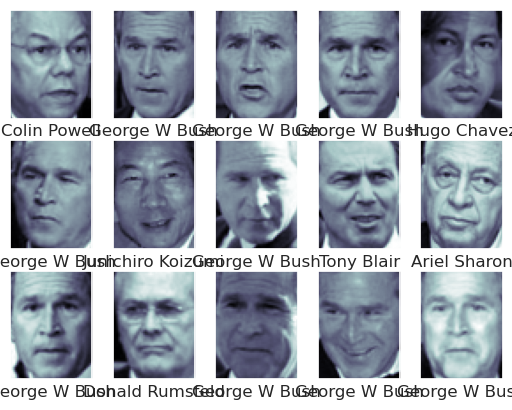

{'svc__C': 50, 'svc__gamma': 0.005}


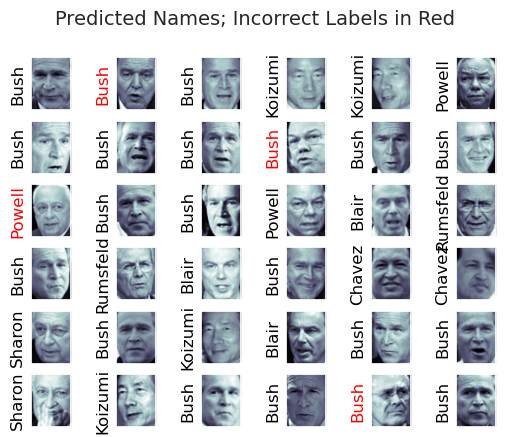

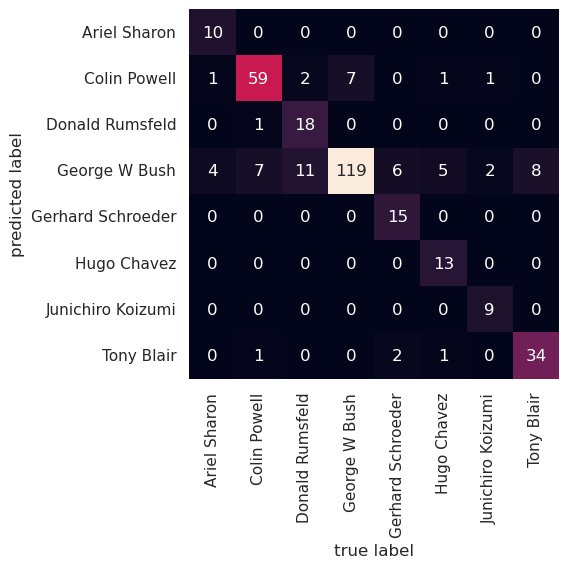

Accuracy =  0.8219584569732937


In [8]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))